<a href="https://colab.research.google.com/github/aadityasomani/Aadi/blob/master/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
matches_df=pd.read_csv("/content/drive/MyDrive/matches.csv")
deliveies_df=pd.read_csv("/content/drive/MyDrive/deliveries.csv")

In [ ]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveies_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveies_df.shape

(150460, 21)

In [ ]:
matches_df.shape

(636, 18)

In [ ]:
teams=matches_df['team1']
matches_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
deliveies_df['batting_team'].describe()

count             150460
unique                14
top       Mumbai Indians
freq               18943
Name: batting_team, dtype: object

In [ ]:
deliveies_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
batsman_score=deliveies_df.loc[:,['batsman_runs','batsman']]
batsman_score['batsman'].describe()

count      150460
unique        461
top       V Kohli
freq         3494
Name: batsman, dtype: object

In [ ]:
highest_run=batsman_score.loc[batsman_score['batsman']=='V Kohli','batsman_runs'].sum()
highest_run

4423

In [ ]:
deliveies_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
len(deliveies_df['batting_team'].unique())

14

In [ ]:
deliveies_df['batting_team']=deliveies_df['batting_team'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

In [ ]:
highest_run=batsman_score.loc[batsman_score['batsman']=='V Kohli','batsman_runs'].sum()
highest_run

4423

In [ ]:
batsman_name=list(batsman_score['batsman'].unique())
len(batsman_name)

461

In [ ]:
runs=[]
for i in batsman_name:
    runs.append(batsman_score.loc[batsman_score['batsman']==i,'batsman_runs'].sum())
    

In [ ]:
runs_seies=pd.Series(runs)

In [ ]:
runs_seies.sort_values(ascending=False)

33     4548
87     4423
19     4207
36     4132
0      4014
       ... 
314       0
399       0
409       0
295       0
319       0
Length: 461, dtype: int64

In [ ]:
batsman_name[33]

'SK Raina'

In [ ]:
batsman_name.index('V Kohli')

87

In [ ]:
runs_df=pd.DataFrame(deliveies_df.groupby(['batsman']).batsman_runs.sum()).sort_values(ascending=False,by='batsman_runs')

In [ ]:
runs_df.head()

,batsman_runs
batsman,
SK Raina,4548
V Kohli,4423
RG Sharma,4207
G Gambhir,4132
DA Warner,4014


In [ ]:
deliveies_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [ ]:
deliveies_df.fillna("0",inplace=True)

In [ ]:
deliveies_df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [ ]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [ ]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:
matches_df['team1']=matches_df['team1'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})
matches_df['team2']=matches_df['team2'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})


In [ ]:
matches_df['winner']=matches_df['winner'].replace({'Rising Pune Supergiant':'Rising Pune Supergiants'})

In [ ]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
deliveies_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
matches_df=matches_df.rename(columns={'id':'match_id'})
matches_df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
matches_df.fillna("0",inplace=True)

In [ ]:
matches_df.isnull().sum()

match_id           0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [ ]:
ipl_df=pd.merge(matches_df,deliveies_df,how='inner',on='match_id')

In [ ]:
ipl_df.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [ ]:
ipl_df.isnull().sum()

match_id            0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
win_by_runs         0
win_by_wickets      0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [ ]:
ipl_df.shape

(150460, 38)

In [ ]:
matches_high=pd.DataFrame(ipl_df.groupby(['team1']).sum()).sort_values(ascending=False,by='match_id')

In [ ]:
matches_high=pd.DataFrame(matches_df['team2'].value_counts())

In [ ]:
matches_high

,team2
Delhi Daredevils,84
Royal Challengers Bangalore,82
Kolkata Knight Riders,80
Mumbai Indians,75
Kings XI Punjab,71
Rajasthan Royals,64
Chennai Super Kings,54
Deccan Chargers,32
Sunrisers Hyderabad,30
Pune Warriors,26


In [ ]:
df1=matches_df.pivot_table(values='team2',index='team1',aggfunc='count')

In [ ]:
df1.reset_index(level=0,inplace=True)

In [ ]:
df1=df1.rename(columns={'team1':'team','team2':'Matches'})
df1

,team,Matches
0,Chennai Super Kings,77
1,Deccan Chargers,43
2,Delhi Daredevils,63
3,Gujarat Lions,14
4,Kings XI Punjab,77
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,68
7,Mumbai Indians,82
8,Pune Warriors,20
9,Rajasthan Royals,54


In [ ]:
df2=matches_df.pivot_table(values='team1',index='team2',aggfunc='count')
df2.reset_index(level=0,inplace=True)
df2=df2.rename(columns={'team1':'Matches','team2':'team'})
df2

,team,Matches
0,Chennai Super Kings,54
1,Deccan Chargers,32
2,Delhi Daredevils,84
3,Gujarat Lions,16
4,Kings XI Punjab,71
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,80
7,Mumbai Indians,75
8,Pune Warriors,26
9,Rajasthan Royals,64


In [ ]:
df=df1.append(df2)
df

,team,Matches
0,Chennai Super Kings,77
1,Deccan Chargers,43
2,Delhi Daredevils,63
3,Gujarat Lions,14
4,Kings XI Punjab,77
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,68
7,Mumbai Indians,82
8,Pune Warriors,20
9,Rajasthan Royals,54


In [ ]:
count_df=pd.DataFrame(df.groupby('team').Matches.sum())
count_df

,Matches
team,
Chennai Super Kings,131
Deccan Chargers,75
Delhi Daredevils,147
Gujarat Lions,30
Kings XI Punjab,148
Kochi Tuskers Kerala,14
Kolkata Knight Riders,148
Mumbai Indians,157
Pune Warriors,46


In [ ]:
count_df.sort_values(ascending=True,by='Matches')

,Matches
team,
Kochi Tuskers Kerala,14
Gujarat Lions,30
Rising Pune Supergiants,30
Pune Warriors,46
Deccan Chargers,75
Sunrisers Hyderabad,76
Rajasthan Royals,118
Chennai Super Kings,131
Delhi Daredevils,147


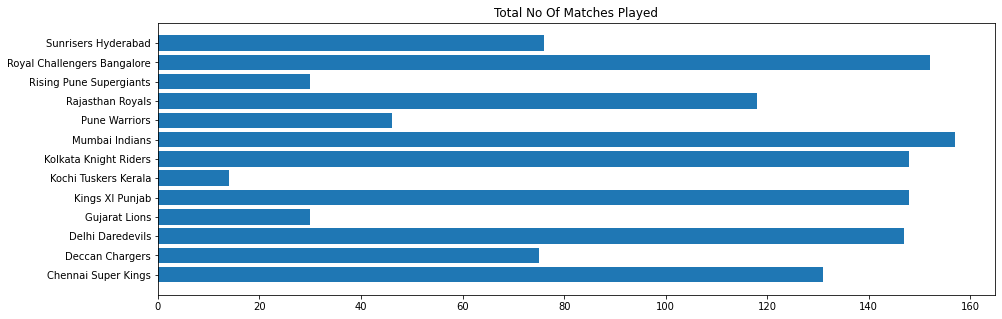

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Total No Of Matches Played")
plt.barh(count_df.index,count_df['Matches'])
plt.show()

In [ ]:
ipl_df.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0,0,0
3,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0,0,0


In [ ]:
ipl_4=ipl_df[ipl_df['batsman_runs']==4]
foures=pd.DataFrame(ipl_4['batsman'].value_counts())
foures

,batsman
G Gambhir,484
SK Raina,402
S Dhawan,401
DA Warner,401
V Kohli,384
...,...
Vishnu Vinod,1
JM Kemp,1
Karanveer Singh,1
S Nadeem,1


In [ ]:
ipl_6=ipl_df[ipl_df['batsman_runs']==6]
sixes=pd.DataFrame(ipl_6['batsman'].value_counts())
sixes

,batsman
CH Gayle,266
SK Raina,174
RG Sharma,173
DA Warner,160
V Kohli,160
...,...
K Upadhyay,1
R McLaren,1
Niraj Patel,1
LPC Silva,1


In [ ]:
pof_df=matches_df['player_of_match']
pof_df.describe()

count          636
unique         202
top       CH Gayle
freq            18
Name: player_of_match, dtype: object

In [ ]:
pof_df.value_counts()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
                  ..
CL White           1
MR Marsh           1
Mohammed Siraj     1
R McLaren          1
JD Ryder           1
Name: player_of_match, Length: 202, dtype: int64

In [ ]:
deliveies_df['dismissal_kind'].value_counts()

0                        143022
caught                     4373
bowled                     1382
run out                     755
lbw                         455
stumped                     243
caught and bowled           211
hit wicket                    9
retired hurt                  9
obstructing the field         1
Name: dismissal_kind, dtype: int64

In [ ]:
bowling_df=deliveies_df[['player_dismissed','dismissal_kind','fielder','bowler']]
bowling_df

,player_dismissed,dismissal_kind,fielder,bowler
0,0,0,0,TS Mills
1,0,0,0,TS Mills
2,0,0,0,TS Mills
3,0,0,0,TS Mills
4,0,0,0,TS Mills
...,...,...,...,...
150455,0,0,0,B Kumar
150456,CJ Jordan,run out,NV Ojha,B Kumar
150457,0,0,0,B Kumar
150458,0,0,0,B Kumar


In [ ]:
catches_df=bowling_df[bowling_df['dismissal_kind']=='caught']
catches_df

,player_dismissed,dismissal_kind,fielder,bowler
11,DA Warner,caught,Mandeep Singh,A Choudhary
64,S Dhawan,caught,Sachin Baby,STR Binny
94,MC Henriques,caught,Sachin Baby,YS Chahal
165,CH Gayle,caught,DA Warner,DJ Hooda
206,TM Head,caught,Yuvraj Singh,Rashid Khan
...,...,...,...,...
150309,Yuvraj Singh,caught,SR Watson,CJ Jordan
150326,Bipul Sharma,caught,YS Chahal,CJ Jordan
150402,CH Gayle,caught,Bipul Sharma,BCJ Cutting
150422,AB de Villiers,caught,MC Henriques,Bipul Sharma


In [ ]:
catches=pd.DataFrame(catches_df.groupby('dismissal_kind').fielder.value_counts())

In [ ]:
catches

fielder
dismissal_kind fielder                  
caught         KD Karthik             88
               SK Raina               83
               AB de Villiers         81
               MS Dhoni               76
               RV Uthappa             75
...                                  ...
               UT Khawaja              1
               V Shankar               1
               WD Parnell (sub)        1
               WP Saha (sub)           1
               Younis Khan             1

[440 rows x 1 columns]

In [ ]:
run_out=bowling_df[bowling_df['dismissal_kind']=='run out']
run_outs=pd.DataFrame(run_out.groupby('dismissal_kind').fielder.value_counts())
run_outs

fielder
dismissal_kind fielder                 
run out        MS Dhoni              20
               RA Jadeja             19
               MK Pandey             14
               V Kohli               14
               AB de Villiers        13
...                                 ...
               VVS Laxman             1
               W Jaffer               1
               WD Parnell             1
               WPUJC Vaas             1
               Y Venugopal Rao        1

[240 rows x 1 columns]

In [ ]:
stump_out=bowling_df[bowling_df['dismissal_kind']=='stumped']
stump_outs=pd.DataFrame(stump_out.groupby('dismissal_kind').fielder.value_counts())
stump_outs

fielder
dismissal_kind fielder                 
stumped        RV Uthappa            32
               MS Dhoni              30
               KD Karthik            26
               WP Saha               17
               AC Gilchrist          16
               PA Patel              14
               NV Ojha               10
               KC Sangakkara          9
               AB de Villiers         7
               KM Jadhav              7
               MS Bisla               7
               SP Goswami             7
               BB McCullum            6
               AP Tare                5
               DH Yagnik              5
               CM Gautam              4
               KL Rahul               4
               Kamran Akmal           4
               YV Takawale            4
               MV Boucher             3
               PR Shah                3
               Q de Kock              3
               RR Pant                3
               SV Samson              3
               AT Rayudu              2
               DJ Jacobs              2
               KB Arun Karthik        2
               M Rawat                2
               N Saini                2
               Vishnu Vinod           2
               Gurkeerat Singh        1
               KH Devdhar             1

In [ ]:
wicket_df=pd.DataFrame(bowling_df.groupby('dismissal_kind').bowler.value_counts())
wicket_df

bowler
dismissal_kind bowler                   
0              Harbhajan Singh      2853
               A Mishra             2561
               P Kumar              2535
               SL Malinga           2524
               PP Chawla            2461
...                                  ...
stumped        TM Dilshan              1
               TM Head                 1
               V Sehwag                1
               WPUJC Vaas              1
               Washington Sundar       1

[1420 rows x 1 columns]